# Clustering Mall Customers
### In this project, I use mall customer data to try to provide advise to the client on how to curate shops to appeal to the different demographics shopping in the same general area.
The dataset is a csv file and includes a unique ID for each entry (CustomerID), the identified gender for each customer (Gender), the age of the customer (Age), the income of the customer per year in thousands (Annual Income (k$)), and a score from 1-100 assigned by the mall based on customer behavior and spending nature (Spending Score (1-100)).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Looking at the shape of the data, we have 200 datapoints and 5 variables.

In [2]:
df.shape

(200, 5)

The dataset comprises of mostly int columns and one string column that could potentially turn into a boolean.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset has no null values so no need to impute.

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

With repeated trials, I found that using the annual income and spending score to predict clusters worked best.

In [5]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

After we extract the features we want, I want to find the ideal number of clusters we can split the data into, so I use the elbow method. I test out a range of clusters from 1 to 9 and I plot the within sum of square of the data and test the elbow at 5 clusters.

In [6]:
temp = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    temp.append(kmeans.inertia_)

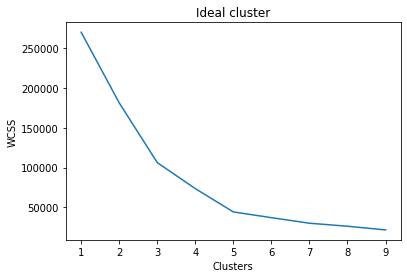

In [7]:
plt.plot(range(1,10), temp)
plt.title('Ideal cluster')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Finally, I cluster all the datapoints into 5 clusters and plot it out.

In [8]:
model = KMeans(n_clusters= 5, init='k-means++')
y_kmeans= model.fit_predict(X)

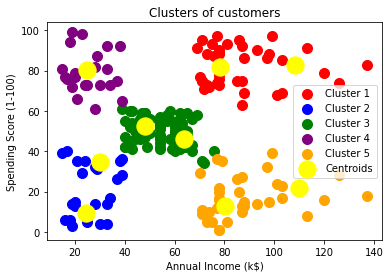

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Conclusion
We can see 5 distinct clusters of behavior using spending score and annual income. The five distinct clusters formed by k-means clustering could potentially represent different groups of people with distinct characteristics and demographics. By looking closer at the characteristics of each cluster, we can guess what shops would be popular if added to the mall.

1. The first cluster (red), with low spending habits scores and low annual incomes, could represent individuals or households with limited financial resources, such as retirees, students or low-income earners. Shops that this group may frequent include:
    1. Dollar store or discount stores: these stores offer low-priced goods and may be more affordable for those with limited financial resources.
    2. Second-hand or thrift stores: these stores offer used goods at a lower cost than brand-new items and may be more appealing to those looking to save money.
    3. Outlet stores: these stores offer discounted goods from popular retailers and may be more appealing to those looking for deals.

2. The second cluster (orange), with high spending habits scores and low annual incomes, could represent individuals or households who are highly impulsive and tend to overspend despite their limited financial resources. Shops that this group may frequent include:
    1. Fast-fashion retailers: these stores offer trendy clothing at low prices, which may appeal to those who are impulsive and want to keep up with the latest fashion trends.
    2. Electronics stores: these stores offer the latest gadgets and technology at competitive prices, which may appeal to those who are willing to spend more on tech-related items.
    3. Convenience stores: these stores offer a wide variety of items at a premium price, which may appeal to those who are willing to spend more for convenience.

3. The third cluster (blue), with medium spending habits scores and medium annual incomes, could represent a broad range of individuals and households who are relatively moderate in their spending habits and have a stable income. Shops that this group may frequent include:
    1. Fast-fashion retailers: these stores offer trendy clothing at low prices, which may appeal to those who are impulsive and want to keep up with the latest fashion trends.
    2. Electronics stores: these stores offer the latest gadgets and technology at competitive prices, which may appeal to those who are willing to spend more on tech-related items.
    3. Convenience stores: these stores offer a wide variety of items at a premium price, which may appeal to those who are willing to spend more for convenience.

4. The fourth cluster (green), with high spending habits scores and high annual incomes, could represent individuals or households who have a high disposable income and are willing to spend a lot on luxury goods and services. Shops that this group may frequent include:
    1. Luxury retailers: these stores offer high-end, expensive goods and may appeal to those who have a high disposable income and are willing to spend a lot on luxury items.
    2. Jewelry stores: these stores offer high-priced, high-quality jewelry and may appeal to those who are looking for high-end luxury items.
    3. Fine dining restaurants: these restaurants offer high-end cuisine and may appeal to those who are willing to spend a lot on fine dining experiences.

5. The final cluster (purple), with low spending habits scores and high annual incomes, could represent individuals or households who are financially well-off but tend to be more frugal in their spending habits. Shops that this group may frequent include:
    1. Investment stores: these stores offer items that are considered good investments, such as art, antiques, and collectibles, which may appeal to those who are financially well-off but tend to be more frugal in their spending habits.
    2. High-end grocery stores: these stores offer premium products and may appeal to those who are looking for high-quality goods but still tend to be more frugal in their spending habits.
    3. Books or stationary stores: these stores offer non-luxury items that can provide value, knowledge, and entertainment and may appeal to those who are financially well-off but tend to be more frugal in their spending habits.

It is important to note that with a limited dataset of only 200 samples, this clustering may change based on more data that can be collected. Using data that is available to me, these are my findings.
